In [1]:
plt.style.use('bmh')

# feats
feats_nft = ['BoredApeYachtClub','MutantApeYachtClub','Otherdeed','Azuki','Moonbirds']
feats_id = ['collection_name','token_id']

### Data

In [2]:
df_trnx = pd.read_pickle('data/df_trnx.pkl')
df_trnx[:3]

,timestamp,exchange_name,contract_version,usd_price,eth_price,royalty_fee,platform_fee,collection_name,token_id,transaction_hash,seller_address,buyer_address,is_multi_token_sale,multi_token_sale_index,day,month,quarter,year,year_month,trnx_len
0,2023-03-23 11:15:23+00:00,opensea,seaport,"21,696.37",12.37,0.06,0.00,MutantApeYachtClub,10972,"<a href=""https://etherscan.io/tx/0x5f438f5b5dd...",0x0097b9cfe64455eed479292671a1121f502bc954,0xdf04f866d8e581982b442b613f8b77655425e545,False,0,2023-03-23,2023-03-01,2023Q1,2023,202303,1
1,2023-03-23 11:03:35+00:00,blur,v1,"21,129.12",12.06,0.06,0.00,MutantApeYachtClub,12974,"<a href=""https://etherscan.io/tx/0x92af5b4a0c8...",0x5e1416e0ec35b47a6b7687c5e783e9b98a83dd45,0x4c092f3597a5c81bcbc6746ed598c58a890d26ff,False,0,2023-03-23,2023-03-01,2023Q1,2023,202303,3
2,2023-03-23 11:03:35+00:00,blur,v1,"21,111.60",12.05,0.06,0.00,MutantApeYachtClub,15768,"<a href=""https://etherscan.io/tx/0x92af5b4a0c8...",0x5e1416e0ec35b47a6b7687c5e783e9b98a83dd45,0x7476a30f99109803dc289850412131dfba8e754d,False,0,2023-03-23,2023-03-01,2023Q1,2023,202303,3


In [3]:
df_nft = pd.read_pickle('data/df_nft.pkl')
df_nft[:3]

,collection_name,token_id,image_url,flattened_properties,minted_timestamp,last_refreshed,trnx_cnt,trnx_sum
0,Azuki,44,"<img style=""max-height:80px;"" src=""https://ikz...","{'Eyes': 'Determined', 'Hair': 'Blonde Flowy',...",2022-01-12,2023-02-03,9,127.25
1,Azuki,53,"<img style=""max-height:80px;"" src=""https://ikz...","{'Eyes': 'Determined', 'Face': 'Blue Sunglasse...",2022-01-12,2023-02-02,3,34.06
2,Azuki,58,"<img style=""max-height:80px;"" src=""https://ikz...","{'Eyes': 'Tired', 'Hair': 'Green Fluffy', 'Typ...",2022-01-12,2023-02-02,3,44.89


### General statistics of all collections

In [4]:
df1 = df_nft.groupby('collection_name').agg({
    'trnx_cnt': sum,
    'trnx_sum': sum,
    'token_id': len,
    'minted_timestamp': min,
})
df1['minted_timestamp'] = (dt.now() - df1['minted_timestamp']).dt.days
df1.columns = ['Number of transactions', 'Total volumes in ETH', 'Number of unique NFTs', 'Days since first mint to April 21,2023']
df1['Average ETH price per transaction'] = df1['Total volumes in ETH'] / df1['Number of transactions']
df1

,Number of transactions,Total volumes in ETH,Number of unique NFTs,"Days since first mint to April 21,2023",Average ETH price per transaction
collection_name,,,,,
Azuki,45731,"521,212.21",9166,472,11.40
BoredApeYachtClub,33483,"1,171,998.47",8915,737,35.00
Moonbirds,30070,"339,631.17",6673,378,11.29
MutantApeYachtClub,60544,"883,444.38",13905,608,14.59
Otherdeed,175690,"677,044.48",44811,365,3.85


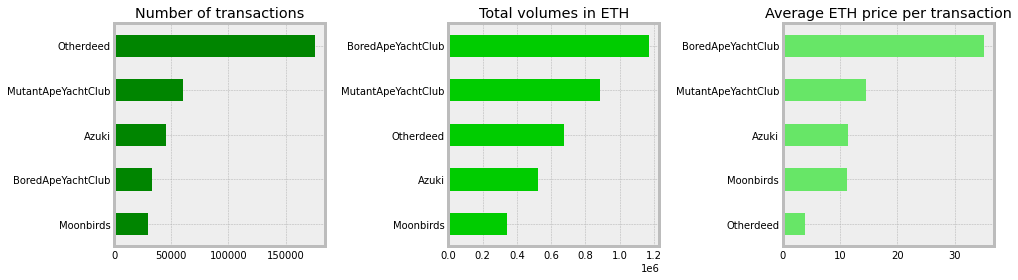

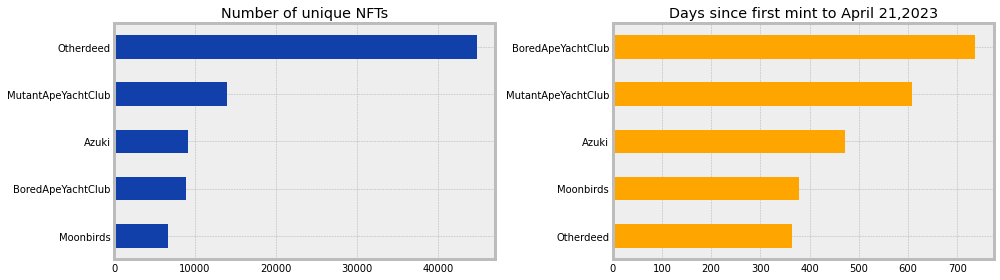

In [5]:
list_names  = list(df1.columns)
list_colors = ['#008500','#00CC00','#67E667','#1240AB','orange']

_, ax = plt.subplots(1,3, figsize = (14,4))
for num,i in enumerate([0,1,4]):
    _ = df1.iloc[:,i].sort_values().plot(ax = ax[num], kind = 'barh', ylabel = '', title = list_names[i], color = list_colors[num])
plt.tight_layout()

_, ax = plt.subplots(1,2, figsize = (14,4))
for num,i in enumerate([2,3]):
    _ = df1.iloc[:,i].sort_values().plot(ax = ax[num], kind = 'barh', ylabel = '', title = list_names[i], color = list_colors[num+3])
plt.tight_layout()


### Analyze how the number of daily transactions for the collections has changed over time

In [6]:
feats_nft1 = feats_nft[:2]
df2 = df_trnx[df_trnx.collection_name.isin(feats_nft1)].groupby(['day','collection_name'])['usd_price'].agg(len).unstack()
print(df2.shape)
df2[:3]

(693, 2)


collection_name,BoredApeYachtClub,MutantApeYachtClub
day,,
2021-04-30,1.00,NaN
2021-05-01,"1,811.00",NaN
2021-05-02,"1,706.00",NaN


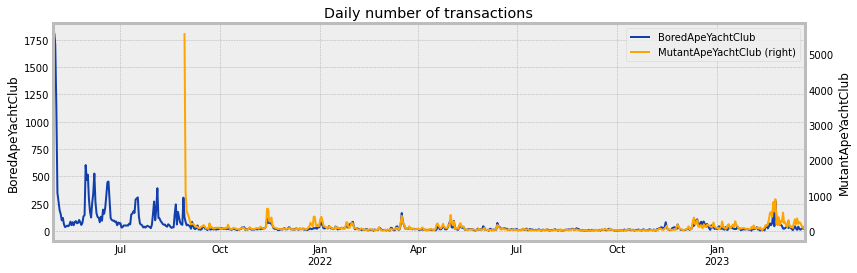

In [7]:
feats1 = list(df2.columns)
_, ax = plt.subplots(1,1, figsize = (12,4))
_ = df2.iloc[:,0].plot(ax = ax, xlabel = '',title = 'Daily number of transactions', color = '#1240AB', ylabel = feats1[0], legend = True)
_ = df2.iloc[:,1].plot(ax = ax, xlabel = '',title = 'Daily number of transactions', color = 'orange',   ylabel = feats1[1], legend = True, secondary_y = True)

,BoredApeYachtClub,MutantApeYachtClub
0,"1,811.00","5,597.00"
1,"1,706.00","1,097.00"
2,"1,142.00",566.00
3,350.00,485.00
4,269.00,396.00
5,191.00,261.00
6,155.00,190.00


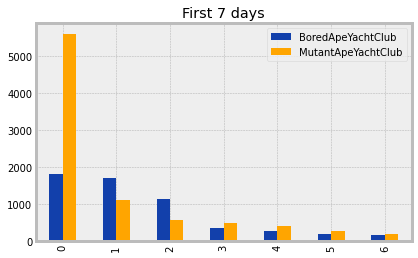

In [8]:
# first 7 days
x = df2.iloc[1:,0]
df3 = x.reset_index()[:7]

x = df2.iloc[:,1].dropna()
df3[feats1[1]] = x.values[:7]
del df3['day']

df3.plot(kind = 'bar', color = ['#1240AB','orange'], title = 'First 7 days')
df3

collection_name,BoredApeYachtClub,MutantApeYachtClub
2021,41.00,82.00
2022,13.00,40.00
2023,22.50,122.00


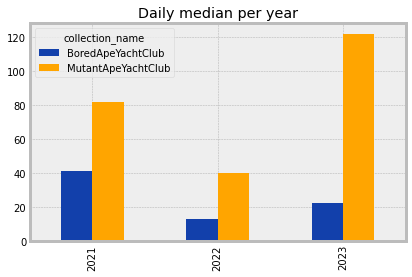

In [9]:
# daily median by the year
df3 = df2.resample('Y').median()
df3.index = ['2021','2022','2023']
df3.plot(kind = 'bar', color = ['#1240AB','orange'], title = 'Daily median per year')
df3

### Price filtering

In [10]:
# create features - current price to max (mean, median) price of NFT
df_trnx['price2max'] = 100*df_trnx.eth_price / df_trnx.groupby(feats_id).eth_price.transform(max)
df_trnx['price2mean'] = 100*df_trnx.eth_price / df_trnx.groupby(feats_id).eth_price.transform(np.mean)
df_trnx['price2median'] = 100*df_trnx.eth_price / df_trnx.groupby(feats_id).eth_price.transform(np.median)
df_trnx['price_good'] = 1

In [11]:
# prices stat
df_prices = df_trnx.groupby(feats_id).eth_price.agg([min,max,np.mean,np.median,np.std, len])
df_prices['max_min'] = df_prices['max'] / df_prices['min']

display(df_prices.loc[feats_nft[0]].sort_values('max_min', ascending = False)[:10])
display(df_prices.loc[feats_nft[1]].sort_values('max_min', ascending = False)[:10])

,min,max,mean,median,std,len,max_min
token_id,,,,,,,
776,0.00,42.90,11.04,0.62,21.25,4,"208,789,913,751.76"
2149,0.00,77.95,64.79,69.58,19.31,26,"779,500.00"
6074,0.00,69.02,22.64,1.45,33.76,6,"690,200.00"
6897,0.00,78.01,16.19,1.67,30.86,6,"211,763.14"
2276,0.00,183.00,59.53,31.00,63.69,7,"183,000.00"
3411,0.00,18.00,9.00,9.00,12.73,2,"180,000.00"
18,0.00,18.00,6.00,3.00,8.29,4,"180,000.00"
5970,0.00,163.00,44.55,23.62,63.41,6,"163,000.00"
2841,0.00,110.00,29.30,14.00,33.70,11,"110,000.00"


,min,max,mean,median,std,len,max_min
token_id,,,,,,,
4396,0.00,41.30,15.50,6.94,17.29,5,"5,221,793.03"
22360,0.00,26.90,17.17,19.60,9.14,9,"269,000.00"
24908,0.00,23.95,11.50,6.25,9.73,7,"239,500.00"
4245,0.00,23.50,9.50,6.00,10.74,5,"235,000.00"
4650,0.00,21.00,10.38,9.75,7.05,6,"210,000.00"
7045,0.00,20.00,13.50,15.08,4.65,28,"200,000.00"
28332,0.00,16.30,13.33,15.11,4.05,32,"163,000.00"
3000,0.00,14.67,5.81,4.95,4.82,6,"146,660.00"
6299,0.00,7.00,3.50,3.50,4.95,2,"70,000.00"


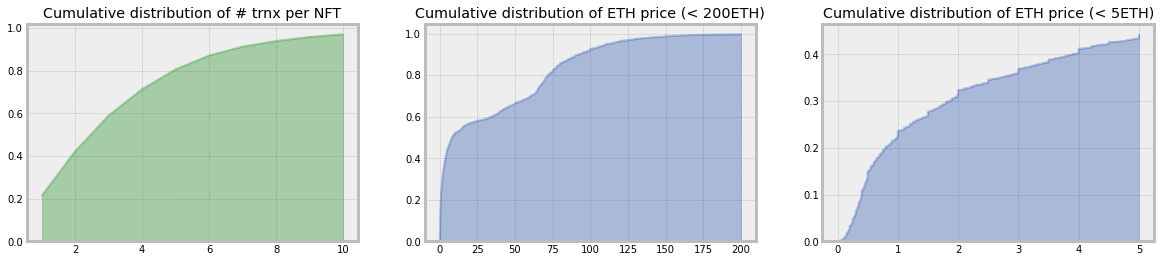

In [12]:
# stat by one collection
feat_nft = feats_nft[0]
color = '#1240AB'

df10 = df_prices.loc[feat_nft]['len'].value_counts(normalize = True).sort_index().cumsum()

f1 = df_trnx.collection_name == feat_nft
df1 = df_trnx[f1].sort_values('eth_price').reset_index()
df11 = df1.eth_price.value_counts(normalize = True).sort_index().cumsum()

_, ax = plt.subplots(1,3, figsize = (18,4))
_ = df10[:10].plot(ax = ax[0], kind = 'area', alpha = 0.3, color = 'green', title = 'Cumulative distribution of # trnx per NFT')
_ = df11[:200].plot(ax = ax[1], kind = 'area', alpha = 0.3, color = color, title = 'Cumulative distribution of ETH price (< 200ETH)')
_ = df11[:5].plot(ax = ax[2], kind = 'area', alpha = 0.3, color = color, title = 'Cumulative distribution of ETH price (< 5ETH)')

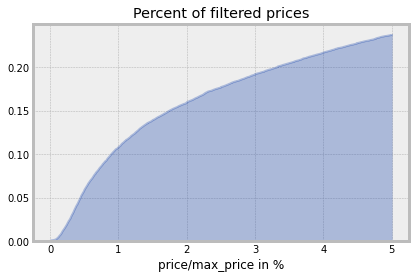

In [13]:
# set new flag
df12 = df1.price2max.value_counts(normalize = True).sort_index().cumsum()
_, ax = plt.subplots(1,1, figsize = (6,4))
_ = df12[:5].plot(ax = ax, kind = 'area', alpha = 0.3, color = color, title = 'Percent of filtered prices', xlabel = 'price/max_price in %')

f1 = df_trnx.collection_name == feat_nft
f2 = df_trnx.price2max < 1
df_trnx.loc[f1&f2,'price_good'] = 0

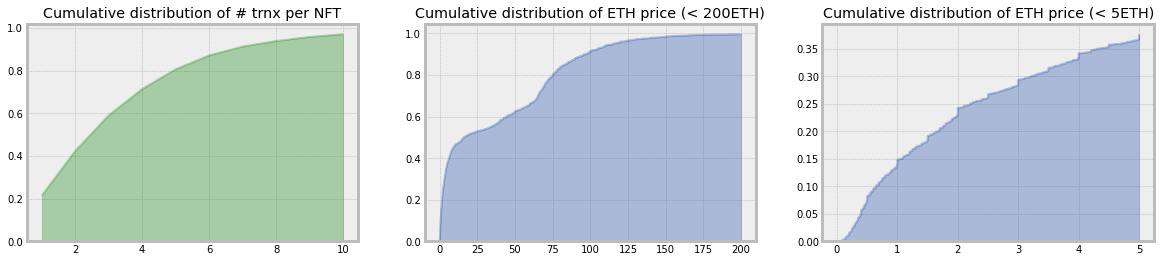

In [14]:
df_trnx = df_trnx[df_trnx.price_good == 1]

# stat by one collection
feat_nft = feats_nft[0]
color = '#1240AB'

df10 = df_prices.loc[feat_nft]['len'].value_counts(normalize = True).sort_index().cumsum()

f1 = df_trnx.collection_name == feat_nft
df1 = df_trnx[f1].sort_values('eth_price').reset_index()
df11 = df1.eth_price.value_counts(normalize = True).sort_index().cumsum()

_, ax = plt.subplots(1,3, figsize = (18,4))
_ = df10[:10].plot(ax = ax[0], kind = 'area', alpha = 0.3, color = 'green', title = 'Cumulative distribution of # trnx per NFT')
_ = df11[:200].plot(ax = ax[1], kind = 'area', alpha = 0.3, color = color, title = 'Cumulative distribution of ETH price (< 200ETH)')
_ = df11[:5].plot(ax = ax[2], kind = 'area', alpha = 0.3, color = color, title = 'Cumulative distribution of ETH price (< 5ETH)')

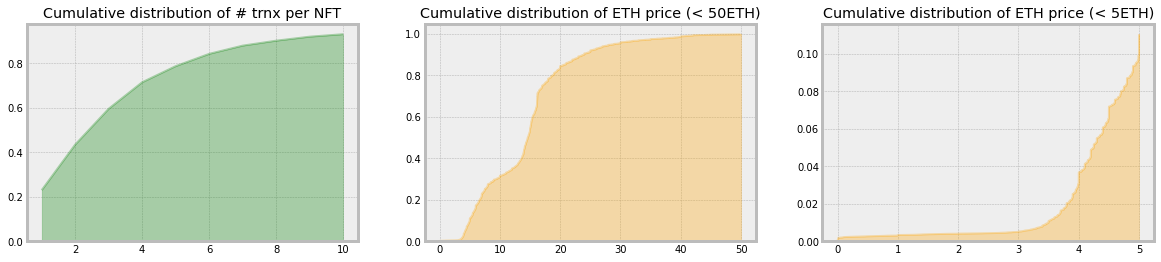

In [15]:
# stat by one collection
feat_nft = feats_nft[1]
color = 'orange'

df10 = df_prices.loc[feat_nft]['len'].value_counts(normalize = True).sort_index().cumsum()

f1 = df_trnx.collection_name == feat_nft
df1 = df_trnx[f1].sort_values('eth_price').reset_index()
df11 = df1.eth_price.value_counts(normalize = True).sort_index().cumsum()

_, ax = plt.subplots(1,3, figsize = (18,4))
_ = df10[:10].plot(ax = ax[0], kind = 'area', alpha = 0.3, color = 'green', title = 'Cumulative distribution of # trnx per NFT')
_ = df11[:50].plot(ax = ax[1], kind = 'area', alpha = 0.3, color = color, title = 'Cumulative distribution of ETH price (< 50ETH)')
_ = df11[:5].plot(ax = ax[2], kind = 'area', alpha = 0.3, color = color, title = 'Cumulative distribution of ETH price (< 5ETH)')

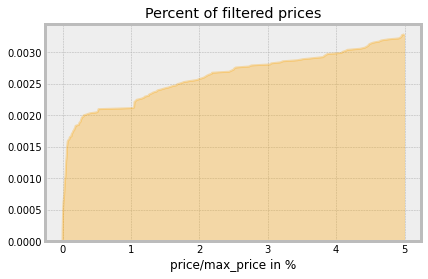

In [16]:
# set new flag
df12 = df1.price2max.value_counts(normalize = True).sort_index().cumsum()
_, ax = plt.subplots(1,1, figsize = (6,4))
_ = df12[:5].plot(ax = ax, kind = 'area', alpha = 0.3, color = color, title = 'Percent of filtered prices', xlabel = 'price/max_price in %')

f1 = df_trnx.collection_name == feat_nft
f2 = df_trnx.price2max < 1
df_trnx.loc[f1&f2,'price_good'] = 0

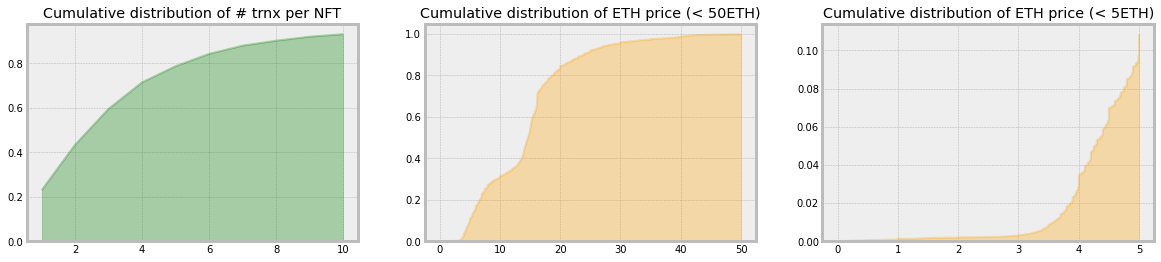

In [17]:
df_trnx = df_trnx[df_trnx.price_good == 1]

# stat by one collection
feat_nft = feats_nft[1]
color = 'orange'

df10 = df_prices.loc[feat_nft]['len'].value_counts(normalize = True).sort_index().cumsum()

f1 = df_trnx.collection_name == feat_nft
df1 = df_trnx[f1].sort_values('eth_price').reset_index()
df11 = df1.eth_price.value_counts(normalize = True).sort_index().cumsum()

_, ax = plt.subplots(1,3, figsize = (18,4))
_ = df10[:10].plot(ax = ax[0], kind = 'area', alpha = 0.3, color = 'green', title = 'Cumulative distribution of # trnx per NFT')
_ = df11[:50].plot(ax = ax[1], kind = 'area', alpha = 0.3, color = color, title = 'Cumulative distribution of ETH price (< 50ETH)')
_ = df11[:5].plot(ax = ax[2], kind = 'area', alpha = 0.3, color = color, title = 'Cumulative distribution of ETH price (< 5ETH)')

In [18]:
df_trnx = df_trnx[df_trnx.price_good == 1]
df_trnx.to_pickle('data/df_trnx1.pkl')

### Traits analysis for NFT 1

In [19]:
# Select collection and create features
def get_traits(x):
    df1 = df_nft[df_nft.collection_name == x].reset_index()
    del df1['index']
    df2 = pd.DataFrame(list(df1.flattened_properties))
    df2 = pd.concat([df1, df2], axis = 1)
    del df2['flattened_properties']
    if 'Name' in df2.columns:
        del df2['Name']
    return df2

df_nft1 = get_traits(feats_nft[0])
feats1 = list(df_nft1.columns)[-7:]

df_nft1['nft_cnt'] = 1

n = df_nft1.shape[0]
print(df_nft1.shape)
df_nft1[:3]

(8915, 15)


,collection_name,token_id,image_url,minted_timestamp,last_refreshed,trnx_cnt,trnx_sum,Fur,Hat,Eyes,Mouth,Clothes,Background,Earring,nft_cnt
0,BoredApeYachtClub,5,"<img style=""max-height:80px;"" src=""https://ipf...",2021-04-22,2023-01-28,1,194.20,Brown,Bayc Flipped Brim,X Eyes,Dumbfounded,Bayc T Red,Army Green,NaN,1
1,BoredApeYachtClub,6,"<img style=""max-height:80px;"" src=""https://ipf...",2021-04-22,2023-01-28,3,162.00,Cream,S&m Hat,Crazy,Bored,Tweed Suit,Yellow,NaN,1
2,BoredApeYachtClub,8,"<img style=""max-height:80px;"" src=""https://ipf...",2021-04-22,2023-01-28,1,110.00,Zombie,Beanie,Robot,Bored,NaN,Aquamarine,Gold Stud,1


          trnx_cnt  trnx_sum  nft_cnt
trnx_cnt      1.00      1.00     1.00
trnx_sum      1.00      1.00     0.99
nft_cnt       1.00      0.99     1.00
          trnx_cnt  trnx_sum  nft_cnt
trnx_cnt      1.00      0.99     0.98
trnx_sum      0.99      1.00     0.95
nft_cnt       0.98      0.95     1.00
          trnx_cnt  trnx_sum  nft_cnt
trnx_cnt      1.00      1.00     0.99
trnx_sum      1.00      1.00     0.97
nft_cnt       0.99      0.97     1.00
          trnx_cnt  trnx_sum  nft_cnt
trnx_cnt      1.00      1.00     1.00
trnx_sum      1.00      1.00     1.00
nft_cnt       1.00      1.00     1.00
          trnx_cnt  trnx_sum  nft_cnt
trnx_cnt      1.00      0.98     0.98
trnx_sum      0.98      1.00     0.95
nft_cnt       0.98      0.95     1.00
          trnx_cnt  trnx_sum  nft_cnt
trnx_cnt      1.00      0.75     0.86
trnx_sum      0.75      1.00     0.46
nft_cnt       0.86      0.46     1.00
          trnx_cnt  trnx_sum  nft_cnt
trnx_cnt      1.00      1.00     1.00
trnx_sum    

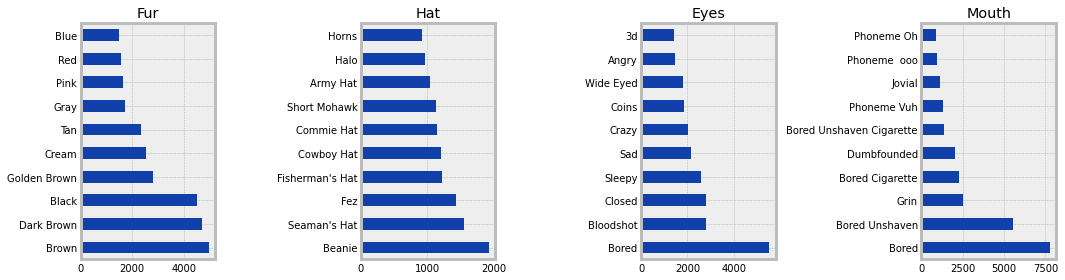

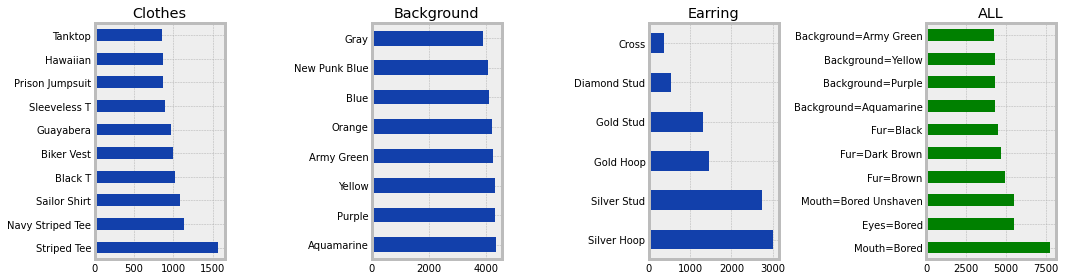

In [20]:
# The most liquid
feats_ag = ['trnx_cnt','trnx_sum','nft_cnt']
top_n = 10
color = '#1240AB'
df_tr_all = pd.DataFrame()

for i,feat in enumerate(feats1):
    df_tr = df_nft1.groupby(feat)[feats_ag].sum()
    print(df_tr.corr())
    if i in [0,4]:
        _, ax = plt.subplots(1,4, figsize = (15,4))
    df_tr.sort_values('trnx_cnt', ascending = False)[:top_n].trnx_cnt.plot(kind = 'barh', title = feat, ylabel = '', ax = ax[i%4], color = color)
    plt.tight_layout()
    
    df_tr['feat'] = feat+'='+df_tr.index
    df_tr_all = pd.concat([df_tr_all, df_tr])
    # plt.savefig(f'presentation/pictures/1{i}.png', bbox_inches='tight')
    # plt.show()
    
df_tr_all.sort_values('trnx_cnt', ascending = False).set_index('feat')[:top_n].trnx_cnt.plot(kind = 'barh', title = 'ALL', ylabel = '', ax = ax[3], color = 'green')
plt.tight_layout()

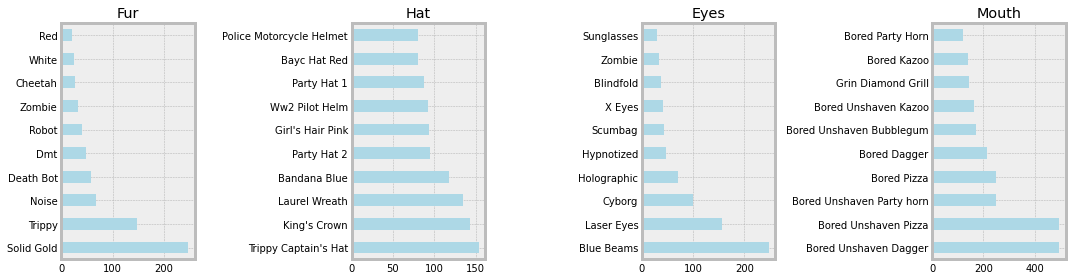

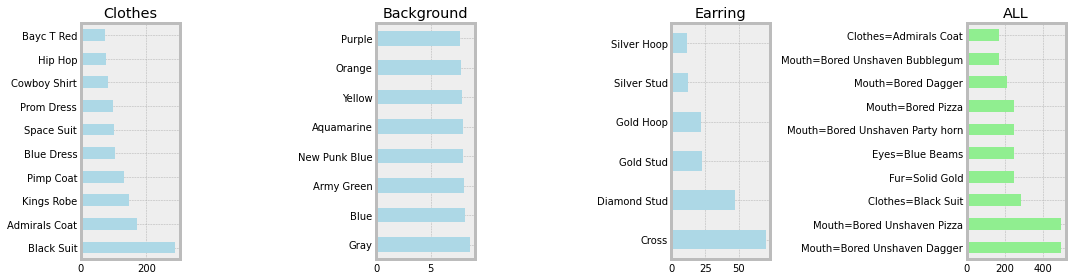

In [21]:
# Rarity scores
feats2 = list()
n = df_nft1.shape[0]
top_n = 10
color = 'lightblue'
df_tr_all = pd.DataFrame()

for i,feat in enumerate(feats1):
    d = (n / df_nft1[feat].value_counts()).to_dict()
    # d = (df_nft1[feat].value_counts()).to_dict()
    
    df_nft1[feat+'_r'] = df_nft1[feat].map(d)
    feats2.append(feat+'_r')
    
    # n1 = df_nft1[feat].notnull().sum() / n
    # n2 = df_nft1[feat].nunique()
    # print(n1, n2)
    
    if i in [0,4]:
        _, ax = plt.subplots(1,4, figsize = (15,4))
    pd.Series(d).sort_values(ascending = False)[:top_n].plot(kind = 'barh', title = feat, ylabel = '', ax = ax[i%4], color = color)
    plt.tight_layout() 
    
    # collect
    df_tr = pd.Series(d).reset_index()
    df_tr['feat'] = feat+'='+df_tr['index']
    df_tr_all = pd.concat([df_tr_all, df_tr])

df_tr_all.sort_values(0, ascending = False).set_index('feat')[:top_n][0].plot(kind = 'barh', title = 'ALL', ylabel = '', ax = ax[3], color = 'lightgreen')
plt.tight_layout()

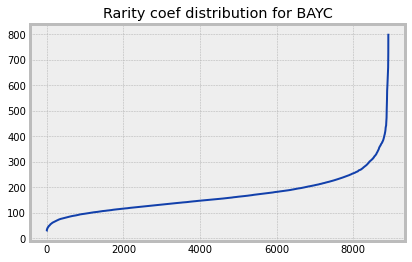

In [22]:
# Rarity calculation
color = '#1240AB'
n = df_nft1.shape[0]
df_nft1['rarity'] = (df_nft1[feats2]).apply(np.sum, axis = 1)
_ = df_nft1.iloc[:,-1].sort_values(ascending = True).reset_index().iloc[:,1].plot(title = 'Rarity coef distribution for BAYC', color = color)

In [23]:
# Groups by rarity
bins = [0,130,170,250,400,np.inf]
labs = ['1_TOP1','2_TOP2','3_TOP3','4_RARE','5_SUPER_RARE']
df_nft1['rarity_segment'] = pd.cut(df_nft1.rarity, bins = bins, labels = labs)
df_nft1['rarity_segment'].value_counts().sort_index()

1_TOP1          2854
2_TOP2          2534
3_TOP3          2544
4_RARE           876
5_SUPER_RARE     107
Name: rarity_segment, dtype: int64

In [24]:
df_nft1.to_pickle('data/df_nft1.pkl')

### Traits analysis for NFT 2

In [25]:
# Select collection and create features
def get_traits(x):
    df1 = df_nft[df_nft.collection_name == x].reset_index()
    del df1['index']
    df2 = pd.DataFrame(list(df1.flattened_properties))
    df2 = pd.concat([df1, df2], axis = 1)
    del df2['flattened_properties']
    if 'Name' in df2.columns:
        del df2['Name']
    return df2

df_nft1 = get_traits(feats_nft[1])
feats1 = list(df_nft1.columns)[-7:]

df_nft1['nft_cnt'] = 1

n = df_nft1.shape[0]
print(df_nft1.shape)
df_nft1[:3]

(13905, 15)


,collection_name,token_id,image_url,minted_timestamp,last_refreshed,trnx_cnt,trnx_sum,Fur,Hat,Eyes,Mouth,Clothes,Background,Earring,nft_cnt
0,MutantApeYachtClub,1,"<img style=""max-height:80px;"" src=""https://ipf...",2021-08-29,2023-02-04,1,7.00,M1 Cream,M1 Baby's Bonnet,M1 Eyepatch,M1 Dumbfounded,M1 Prison Jumpsuit,M1 Gray,NaN,1
1,MutantApeYachtClub,2,"<img style=""max-height:80px;"" src=""https://ipf...",2021-08-29,2023-02-06,4,76.15,M1 Brown,M1 Police Motorcycle Helmet,M1 Bored,M1 Bored,M1 Striped Tee,M1 Blue,NaN,1
2,MutantApeYachtClub,3,"<img style=""max-height:80px;"" src=""https://ipf...",2021-08-29,2023-02-02,9,128.75,M1 Golden Brown,M1 Horns,M1 Zombie,M1 Bored Unshaven,NaN,M1 Yellow,NaN,1


          trnx_cnt  trnx_sum  nft_cnt
trnx_cnt      1.00      1.00     0.99
trnx_sum      1.00      1.00     0.99
nft_cnt       0.99      0.99     1.00
          trnx_cnt  trnx_sum  nft_cnt
trnx_cnt      1.00      1.00     0.99
trnx_sum      1.00      1.00     0.99
nft_cnt       0.99      0.99     1.00
          trnx_cnt  trnx_sum  nft_cnt
trnx_cnt      1.00      1.00     0.99
trnx_sum      1.00      1.00     0.99
nft_cnt       0.99      0.99     1.00
          trnx_cnt  trnx_sum  nft_cnt
trnx_cnt      1.00      1.00     0.99
trnx_sum      1.00      1.00     1.00
nft_cnt       0.99      1.00     1.00
          trnx_cnt  trnx_sum  nft_cnt
trnx_cnt      1.00      1.00     0.98
trnx_sum      1.00      1.00     0.97
nft_cnt       0.98      0.97     1.00
          trnx_cnt  trnx_sum  nft_cnt
trnx_cnt      1.00      1.00     1.00
trnx_sum      1.00      1.00     1.00
nft_cnt       1.00      1.00     1.00
          trnx_cnt  trnx_sum  nft_cnt
trnx_cnt      1.00      1.00     0.99
trnx_sum    

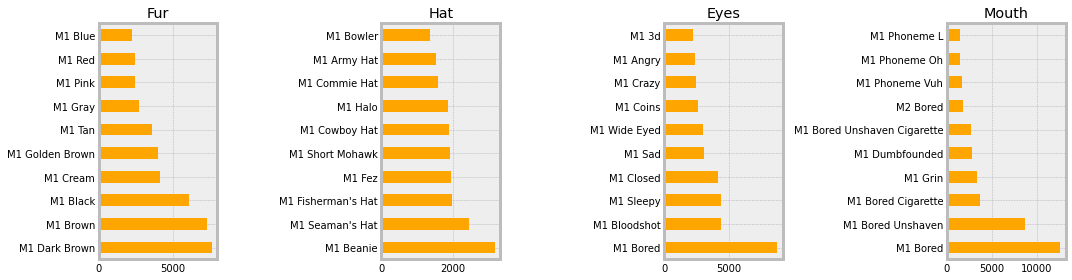

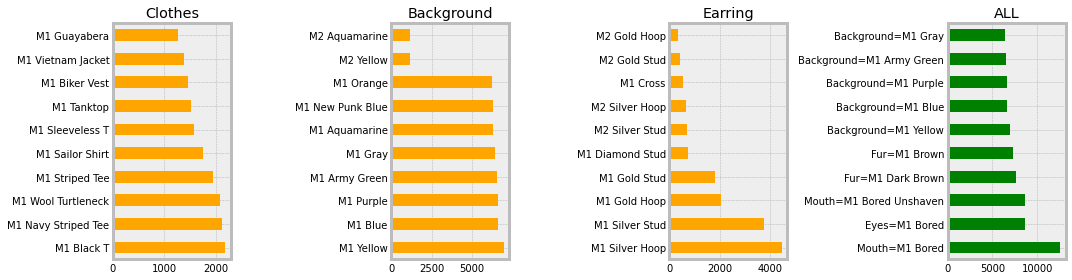

In [26]:
# The most liquid
feats_ag = ['trnx_cnt','trnx_sum','nft_cnt']
top_n = 10
color = 'orange'
df_tr_all = pd.DataFrame()

for i,feat in enumerate(feats1):
    df_tr = df_nft1.groupby(feat)[feats_ag].sum()
    print(df_tr.corr())
    if i in [0,4]:
        _, ax = plt.subplots(1,4, figsize = (15,4))
    df_tr.sort_values('trnx_cnt', ascending = False)[:top_n].trnx_cnt.plot(kind = 'barh', title = feat, ylabel = '', ax = ax[i%4], color = color)
    plt.tight_layout()
    
    df_tr['feat'] = feat+'='+df_tr.index
    df_tr_all = pd.concat([df_tr_all, df_tr])
    # plt.savefig(f'presentation/pictures/1{i}.png', bbox_inches='tight')
    # plt.show()
    
df_tr_all.sort_values('trnx_cnt', ascending = False).set_index('feat')[:top_n].trnx_cnt.plot(kind = 'barh', title = 'ALL', ylabel = '', ax = ax[3], color = 'green')
plt.tight_layout()

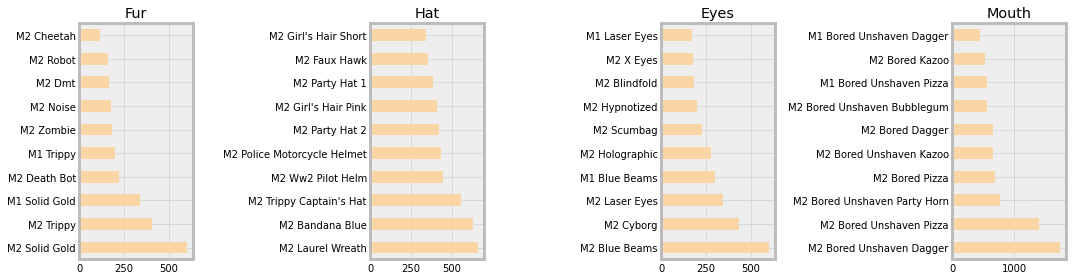

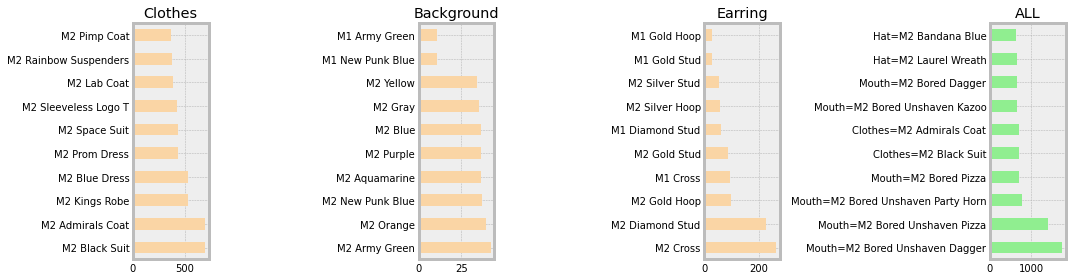

In [27]:
# Rarity scores
feats2 = list()
n = df_nft1.shape[0]
top_n = 10
color = '#fad5a5'
df_tr_all = pd.DataFrame()

for i,feat in enumerate(feats1):
    d = (n / df_nft1[feat].value_counts()).to_dict()
    # d = (df_nft1[feat].value_counts()).to_dict()
    df_nft1[feat+'_r'] = df_nft1[feat].map(d)
    feats2.append(feat+'_r')
    
    # n1 = df_nft1[feat].notnull().sum() / n
    # n2 = df_nft1[feat].nunique()
    # print(n1, n2)
    
    if i in [0,4]:
        _, ax = plt.subplots(1,4, figsize = (15,4))
    pd.Series(d).sort_values(ascending = False)[:top_n].plot(kind = 'barh', title = feat, ylabel = '', ax = ax[i%4], color = color)
    plt.tight_layout() 
    
    # collect
    df_tr = pd.Series(d).reset_index()
    df_tr['feat'] = feat+'='+df_tr['index']
    df_tr_all = pd.concat([df_tr_all, df_tr])

df_tr_all.sort_values(0, ascending = False).set_index('feat')[:top_n][0].plot(kind = 'barh', title = 'ALL', ylabel = '', ax = ax[3], color = 'lightgreen')
plt.tight_layout()

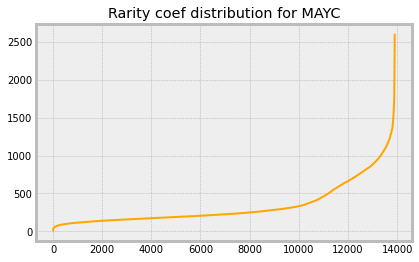

In [28]:
# Rarity calculation
color = 'orange'
n = df_nft1.shape[0]
df_nft1['rarity'] = (df_nft1[feats2]).apply(np.sum, axis = 1)
_ = df_nft1.iloc[:,-1].sort_values(ascending = True).reset_index().iloc[:,1].plot(title = 'Rarity coef distribution for MAYC', color = color)

In [29]:
# Groups by rarity
bins = [0,170,230,500,1200,np.inf]
labs = ['1_TOP1','2_TOP2','3_TOP3','4_RARE','5_SUPER_RARE']
df_nft1['rarity_segment'] = pd.cut(df_nft1.rarity, bins = bins, labels = labs)
df_nft1['rarity_segment'].value_counts().sort_index()

1_TOP1          3701
2_TOP2          3485
3_TOP3          4008
4_RARE          2473
5_SUPER_RARE     234
Name: rarity_segment, dtype: int64

In [30]:
df_nft1.to_pickle('data/df_nft2.pkl')

### Comparing rarity segments

In [31]:
df_nft1 = pd.read_pickle('data/df_nft1.pkl')
df_nft2 = pd.read_pickle('data/df_nft2.pkl')

In [32]:
df_nft1.merge(df_trnx, on = feats_id).groupby('rarity_segment').agg({
    'rarity': [min,max],
    'token_id': [lambda x: len(set(x)), lambda x: len(set(x))/len(df_nft1)],
    'eth_price': [np.mean]
})

rarity          token_id            eth_price
                  min    max <lambda_0> <lambda_1>      mean
rarity_segment                                              
1_TOP1          26.82 129.98       2854       0.32     37.36
2_TOP2         130.04 169.94       2534       0.28     38.33
3_TOP3         170.00 249.94       2544       0.29     38.56
4_RARE         250.01 399.48        876       0.10     47.17
5_SUPER_RARE   402.21 801.78        107       0.01     97.39

In [33]:
df_nft2.merge(df_trnx, on = feats_id).groupby('rarity_segment').agg({
    'rarity': [min,max],
    'token_id': [lambda x: len(set(x)), lambda x: len(set(x))/len(df_nft2)],
    'eth_price': [np.mean]
})

rarity            token_id            eth_price
                    min      max <lambda_0> <lambda_1>      mean
rarity_segment                                                  
1_TOP1            32.19   169.99       3701       0.27     13.74
2_TOP2           170.03   229.92       3485       0.25     13.76
3_TOP3           230.00   499.76       4008       0.29     14.31
4_RARE           500.09 1,199.46       2473       0.18     18.71
5_SUPER_RARE   1,200.11 2,604.88        234       0.02     31.97

### Traits correlations with the prices

In [34]:
df_nft1.merge(df_trnx, on = feats_id).corr().loc[feats2,'eth_price'].sort_values(ascending = False)

Fur_r           0.13
Eyes_r          0.06
Clothes_r       0.03
Hat_r           0.03
Mouth_r         0.03
Background_r    0.01
Earring_r      -0.01
Name: eth_price, dtype: float64

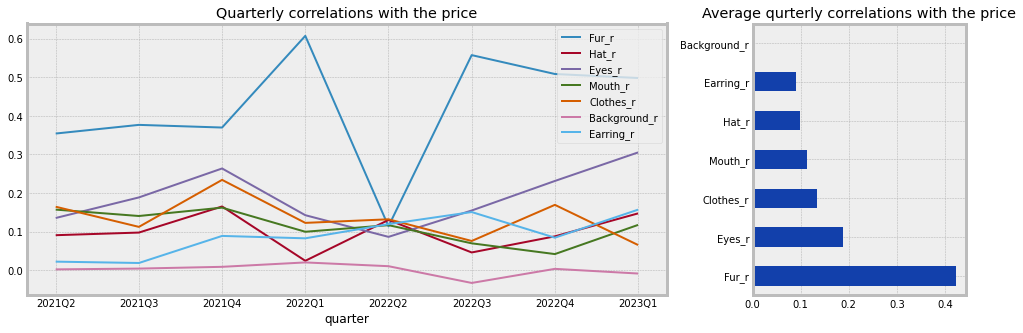

In [35]:
color = '#1240AB'
_, ax = plt.subplots(1,2, figsize = (15,5), gridspec_kw={'width_ratios': [3, 1]})

df_corr = df_nft1.merge(df_trnx, on = feats_id).groupby('quarter').corr()['eth_price'].unstack()[feats2]
df_corr.plot(ax = ax[0], title = 'Quarterly correlations with the price')

_ = df_corr.mean().sort_values(ascending = False).plot(ax = ax[1], kind = 'barh', color = color, title = 'Average qurterly correlations with the price')

In [36]:
df_nft2.merge(df_trnx, on = feats_id).corr().loc[feats2,'eth_price'].sort_values(ascending = False)

Fur_r          0.23
Earring_r      0.17
Background_r   0.14
Eyes_r         0.14
Clothes_r      0.14
Hat_r          0.13
Mouth_r        0.10
Name: eth_price, dtype: float64

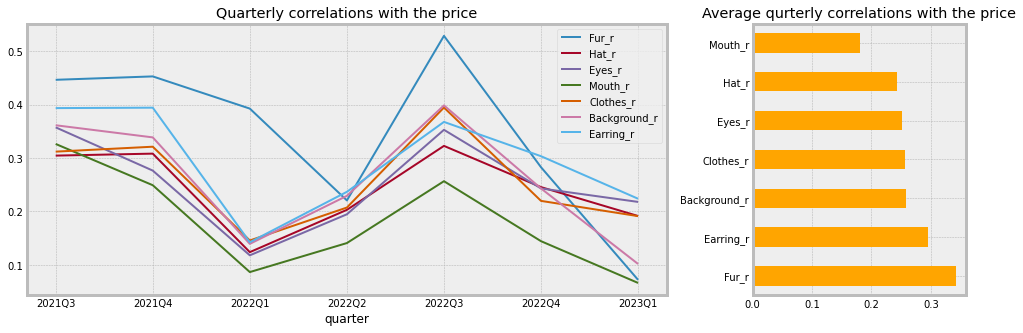

In [37]:
color = 'orange'
_, ax = plt.subplots(1,2, figsize = (15,5), gridspec_kw={'width_ratios': [3, 1]})

df_corr = df_nft2.merge(df_trnx, on = feats_id).groupby('quarter').corr()['eth_price'].unstack()[feats2]
df_corr.plot(ax = ax[0], title = 'Quarterly correlations with the price')

_ = df_corr.mean().sort_values(ascending = False).plot(ax = ax[1], kind = 'barh', color = color, title = 'Average qurterly correlations with the price')

### Traits statistics quarterly

In [38]:
color = '#1240AB'
df1 = df_nft1.merge(df_trnx, on = feats_id)
df2 = pd.melt(df1, id_vars = ['day','month','quarter','year','eth_price'], value_vars = feats1)
df2['feat'] = df2.variable + '=' + df2.value
print(df2.shape)
df2 = df2[df2.feat.notnull()]

df2['month'] = df2.month.astype(str).str[:7]
list_quarter = sorted(df2.quarter.unique())
list_month = sorted(df2.month.unique())
list_year = sorted(df2.year.unique())

print(df2.shape)
print(df2.day.min(),df2.day.max())

print(df3.shape)
df3 = df2.groupby(['month','feat']).eth_price.agg([sum,np.mean]).reset_index()

df4 = df2.groupby(['month','feat']).eth_price.agg([sum,np.mean]).unstack()
# df3[:3]

(209216, 8)
(175283, 8)
2021-04-30 00:00:00 2023-03-23 00:00:00
(3, 2)


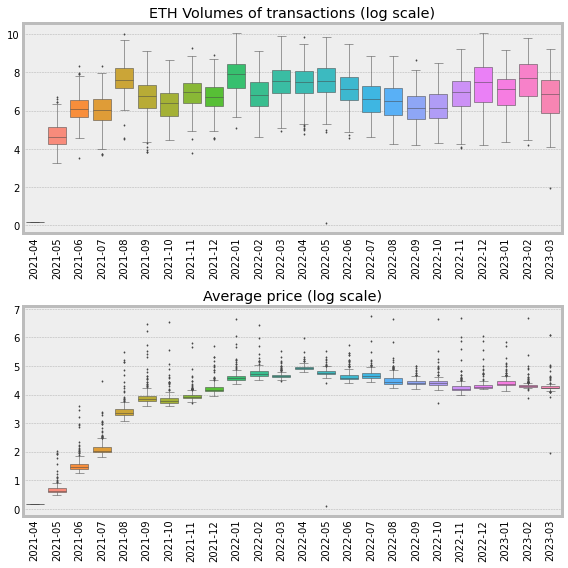

In [39]:
_, ax = plt.subplots(2,1, figsize = (8,8))#, sharey = True)

p = sns.boxplot(x=df3.month, y=df3['sum'].map(np.log1p), ax = ax[0], order=list_month, linewidth=0.5, saturation=1, fliersize = 1)
p.set_title('ETH Volumes of transactions (log scale)')
p.set_xlabel('')
p.set_ylabel('')
_ = p.set_xticklabels(p.get_xticklabels(),rotation=90)

p = sns.boxplot(x=df3.month, y=df3['mean'].map(np.log1p), ax = ax[1], order=list_month, linewidth=0.5, saturation=1, fliersize = 1)
p.set_title('Average price (log scale)')
p.set_xlabel('')
p.set_ylabel('')
_ = p.set_xticklabels(p.get_xticklabels(),rotation=90)
plt.tight_layout()

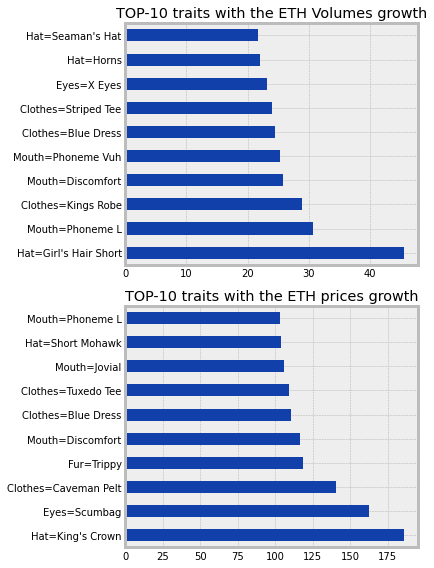

In [40]:
_, ax = plt.subplots(2,1, figsize = (6,8))#, sharey = True)

x = df4['sum'].T.iloc[:,-1] / df4['sum'].T.iloc[:,1]
_ = x.sort_values(ascending = False)[:10].plot(ax = ax[0], kind = 'barh', color = color, ylabel = '', title = 'TOP-10 traits with the ETH Volumes growth')

x = df4['mean'].T.iloc[:,-1] / df4['mean'].T.iloc[:,1]
_ = x.sort_values(ascending = False)[:10].plot(ax = ax[1], kind = 'barh', color = color, ylabel = '', title = 'TOP-10 traits with the ETH prices growth')
plt.tight_layout()

In [41]:
color = 'orange'
df1 = df_nft2.merge(df_trnx, on = feats_id)
df2 = pd.melt(df1, id_vars = ['day','month','quarter','year','eth_price'], value_vars = feats1)
df2['feat'] = df2.variable + '=' + df2.value
print(df2.shape)
df2 = df2[df2.feat.notnull()]

df2['month'] = df2.month.astype(str).str[:7]
list_quarter = sorted(df2.quarter.unique())
list_month = sorted(df2.month.unique())
list_year = sorted(df2.year.unique())

print(df2.shape)
print(df2.day.min(),df2.day.max())

print(df3.shape)
df3 = df2.groupby(['month','feat']).eth_price.agg([sum,np.mean]).reset_index()

df4 = df2.groupby(['month','feat']).eth_price.agg([sum,np.mean]).unstack()
# df3[:3]

(422919, 8)
(352845, 8)
2021-08-29 00:00:00 2023-03-23 00:00:00
(3742, 4)


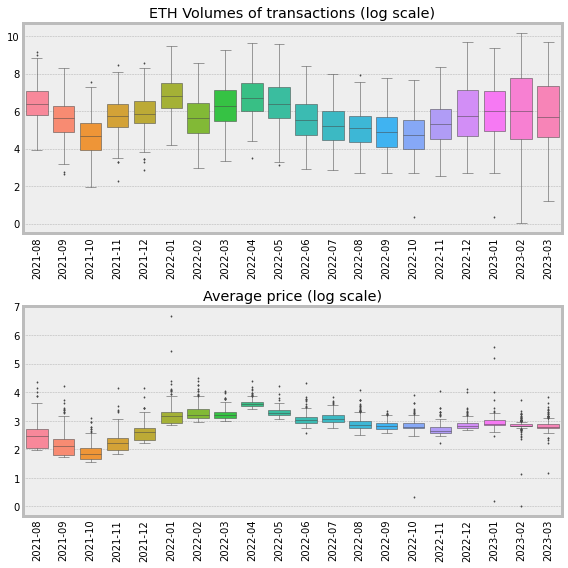

In [44]:
_, ax = plt.subplots(2,1, figsize = (8,8))#, sharey = True)

p = sns.boxplot(x=df3.month, y=df3['sum'].map(np.log1p), ax = ax[0], order=list_month, linewidth=0.5, saturation=1, fliersize = 1)
p.set_title('ETH Volumes of transactions (log scale)')
p.set_xlabel('')
p.set_ylabel('')
_ = p.set_xticklabels(p.get_xticklabels(),rotation=90)

p = sns.boxplot(x=df3.month, y=df3['mean'].map(np.log1p), ax = ax[1], order=list_month, linewidth=0.5, saturation=1, fliersize = 1)
p.set_title('Average price (log scale)')
p.set_xlabel('')
p.set_ylabel('')
_ = p.set_xticklabels(p.get_xticklabels(),rotation=90)
plt.tight_layout()

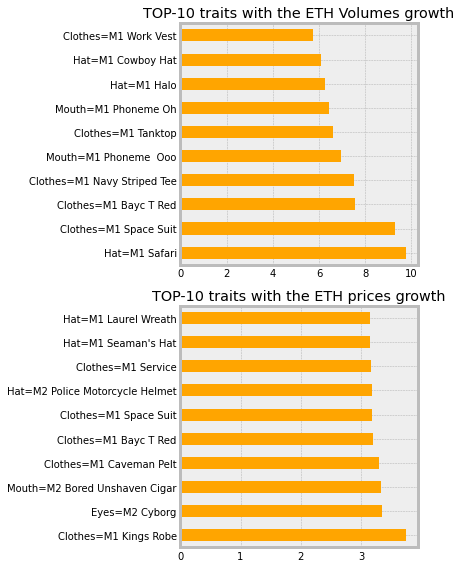

In [43]:
_, ax = plt.subplots(2,1, figsize = (6,8))#, sharey = True)

x = df4['sum'].T.iloc[:,-1] / df4['sum'].T.iloc[:,1]
_ = x.sort_values(ascending = False)[:10].plot(ax = ax[0], kind = 'barh', color = color, ylabel = '', title = 'TOP-10 traits with the ETH Volumes growth')

x = df4['mean'].T.iloc[:,-1] / df4['mean'].T.iloc[:,1]
_ = x.sort_values(ascending = False)[:10].plot(ax = ax[1], kind = 'barh', color = color, ylabel = '', title = 'TOP-10 traits with the ETH prices growth')
plt.tight_layout()